# Analysis for Continuous Improvement

Author Name: Maya Arora

9-digit PID: 730410153

Continuous Improvement embraces a belief there is _always room to make things better_. It is a mindset and process we value and practice in this course. In this assignment, you are able to practice continuous improvement and contribute to the design ideas of the course.

## Brainstorming Ideas

Reflect on your personal experiences and observations in COMP110 and **brainstorm modifications to the course that _create value_ beyond its current design**. When brainstorming, try not to be critical of the ideas you come up with regarding scale, stakeholders impacted, or for any other reasons. In the markdown cell below, brainstorm 3 to 5 ideas you think would create value for you.

Each brainstormed idea should state a. the suggested change or addition, b. what the expected value created, and c. which specific stakeholders would benefit.  If helpful, expand on the following template "The course should (state idea here) because it will (state value created here) for (insert stakeholders here)."

Example A: "The course should use only examples from psychology experiments because it will be more relevant for students who are psychology majors."

Example B: "The course should not have post-lesson questions because they are not useful for most students in the class."

### Part 1. Creative Ideation

1. This course should offer synchronous classes for every class because it will support the students who benefit from in-person learning.
2. This course should offer options to integrate exercises with a student's interest/major because it would make them more passionate about their work.
3. This course should have quizzes more frequently to assess understanding better and give students more time to improve their grade.
4. This course should provide note guides to help students further understand how concepts connect.
5. This course should assign smaller exercises with more frequency to reinforce individual topics more and provide more practice opportunities.

## Connecting with Available Data

The data you have available for this analysis is limited to the anonymized course survey you and your peers filled out a few weeks ago. The data is found in the `survey.csv` file in this exercise directory. Each row represents an individual survey response. Each column has a description which can be found on the project write-up here: <https://22s.comp110.com/exercises/ex08.html>

Review the list of available data and identify which one of your ideas _does not_, or is _least likely to_, have relevant data to support the analysis of your idea to create value. In the box below, identify which of your ideas lacks data and suggest how we might be able to collect this data in the future. One aspect of _continuous improvement_ is trying to avoid "tunnel vision" where possible improvements are not considered because there is no data available to analyze it. Identifying new data sources can unlock improvements!

### Part 2. Identifying Missing Data

1. Idea without sufficient data to analyze: note guides.

2. Suggestion for how to collect data to support this idea in the future: The survey could collect data on how frequently they need to look up concepts online. These concepts would have to be ones that the instructors feel students should have a good understanding of just by watching the videos/attending class. Data could also be collected on how well a student feels they apply these concepts in the exercises or if they are unable to make the connections between concepts and applications. Both of these could provide insight on whether students might benefit from a more structured guide of the concepts.

## Choosing an Idea to Analyze

Consider those of your ideas which _do_ seem likely to have relevant data to analyze. If none of your ideas do, spend a few minutes and brainstorm another idea or two with the added connection of data available on hand and add those ideas to your brainstormed ideas list.

Select the one idea which you believe is _most valuable_ to analyze relative to the others and has data to support the analysis of. In the markdown cell for Part 3 below, identify the idea you are exploring and articulate why you believe it is most valuable (e.g. widest impact, biggest opportunity for improvement, simplest change for significant improvement, and so on).

### Part 3. Choosing Your Analysis

1. Idea to analyze with available data: the ability to integrate exercises with personal interests.

2. This idea is more valuable than the others brainstormed because: each student is interested/passionate about something and they are usually more motivated when something relates to their interests. This is an idea that would affect all students and improve learning through self-motivation. The structure of the course will never be perfect for every student, but the course can always encourage more opportunities for self-motivation, in whatever form that may be


## Your Analysis

Before you begin analysis, a reminder that we do not expect the data to support everyone's ideas and you can complete this exercise for full credit even if the data does not clearly support your suggestion or even completely refutes it. What we are looking for is a logical attempt to explore the data using the techniques you have learned up until now in a way that _either_ supports, refutes, or does not have a clear result and then to reflect on your findings after the analysis.

Using the utility functions you created for the previous exercise, you will continue with your analysis in the following part. Before you begin, refer to the rubric on the technical expectations of this section in the exercise write-up.

In this section, you are expected to interleave code and markdown cells such that for each step of your analysis you are starting with an English description of what you are planning to do next in a markdown cell, followed by a Python cell that performs that step of the analysis.

### Part 4. Analysis

We begin by changing some settings in the notebook to automatically reload changes to imported files.

In [216]:
%reload_ext autoreload
%autoreload 2

We continue by importing the helper functions from `data_utils`.

In [217]:
from new_data_utils import read_csv_rows, head, columnar, select, count

Next, ... (you take it from here and add additional code and markdown cells to read in the CSV file and process it as needed)

In [218]:
SURVEY_DATA_CSV_FILE_PATH: str = "../../data/survey.csv"

The function `read_csv_rows` shows how many people who answered this survey are Neuroscience majors.

In [219]:
from new_data_utils import read_csv_rows

data_rows: list[dict[str, str]] = read_csv_rows(SURVEY_DATA_CSV_FILE_PATH)

if len(data_rows) == 0:
    print("Error: no rows to read.")
else:
    print(f"This is data from: {SURVEY_DATA_CSV_FILE_PATH}")

This is data from: ../../data/survey.csv


The function `head` shows the first 10 rows of data. The `columnar` function is used to convert the data from a row-table to a column table.


In [220]:
from new_data_utils import columnar, head
from tabulate import tabulate

column_table: dict[str, list[str]] = columnar(data_rows)

non_comp_sci_majors: list[str] = []
for primary_major in column_table:
    for item in primary_major:
        if item != "Computer Science":
            non_comp_sci_majors.append(item)
print(f'{len(non_comp_sci_majors)} students in this class are not computer science majors!')

initial_lines: dict[str, list[str]] = head(column_table, 20)
tabulate(initial_lines, initial_lines.keys(), "html")
numbers: list[str] = initial_lines["interesting"]

i: int = 0
counter: int = 0
while i < len(numbers):
    if numbers[i] == '7':
        counter += 1
    i += 1
print(f'{counter} of the first 15 responses rated their interest in this class as a 7.')



380 students in this class are not computer science majors!
11 of the first 15 responses rated their interest in this class as a 7.


The `select` function is used to see how many people expressed the rated their intelletual interest of the class at the highest level.

In [226]:
from new_data_utils import select, count

selected_data: dict[str, list[str]] = select(column_table, ["interesting"])

def total(one: dict[str, list[str]]) -> int:
    high_interest: list[str] = []
    medium_interest: list[str] = []
    low_interest: list[str] = []
    for key in selected_data:
        interest_levels: list[str] = selected_data[key]
        i: int = 0
        while i < len(selected_data[key]):
            if interest_levels[i] == "7":
                high_interest.append(interest_levels[i])
            if interest_levels[i] == "6":
                high_interest.append(interest_levels[i])
            if interest_levels[i] == "5":
                medium_interest.append(interest_levels[i])
            if interest_levels[i] == "4":
                medium_interest.append(interest_levels[i])
            if interest_levels[i] == "3":
                medium_interest.append(interest_levels[i])
            if interest_levels[i] == "2":
                low_interest.append(interest_levels[i])
            if interest_levels[i] == "1":
                low_interest.append(interest_levels[i])
            i += 1
    return(len(high_interest))

analysis: int = total(selected_data)
print(f'{analysis} students rated their interest in this class as a 6 or 7.')

pyplot_labels: dict[str, int] = count(selected_data["interesting"])
sorted_labels = sorted(pyplot_labels.items(), key = lambda kv: kv[1])
dictionary_sorted = dict(sorted_labels)
print(f'Frequencies of interest ratings: {dictionary_sorted}')

437 students rated their interest in this class as a 6 or 7.
Frequencies of interest ratings: {'1': 7, '2': 7, '3': 16, '4': 47, '5': 106, '6': 144, '7': 293}


This is a plot that show the interest levels of all majors in this class.

This graph is a visual respresentation of the frequencies of students' interest levels in this class.


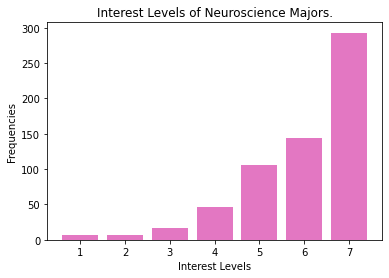

In [227]:
from matplotlib import pyplot

for key in pyplot_labels:
    pyplot.title("Interest Levels of Neuroscience Majors.")
    pyplot.xlabel("Interest Levels")
    pyplot.ylabel("Frequencies")
    interest: str = dictionary_sorted.keys()
    frequency: int = dictionary_sorted.values()
    pyplot.bar(interest, frequency)
print("This graph is a visual respresentation of the frequencies of students' interest levels in this class.")

## Conclusion

In the following markdown cell, write a reflective conclusion given the analysis you performed and identify recommendations.

If your analysis of the data supports your idea, state your recommendation for the change and summarize the data analysys results you found which support it. Additionally, describe any extensions or refinements to this idea which might be explored further. Finally, discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by this proposed change.

If your analysis of the data is inconclusive, summarize why your data analysis results were inconclusive in the support of your idea. Additionally, describe what experimental idea implementation or additional data collection might help build more confidence in assessing your idea. Finally, discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by experimenting with your idea.

Finally, if your analysis of the data does not support it, summarize your data analysis results and why it refutes your idea. Discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by this proposed change. If you disagree with the validity of the findings, describe why your idea still makes sense to implement and what alternative data would better support it. If you agree with the validity of the data analysis, describe what alternate ideas or extensions you would explore instead. 

### Part 5. Conclusion

Based on the data, the class already has high rates of high interest levels. Based on the fact that the number of students considered to have a `low-interest,` or rating their interest as a `1` or `2`, is only `14 students`, so the course does not need to work hard to improve that aspect. Additionally, the number of students who rated their interest as `medium,` or as a `3`, `4`, or `5`, was `169 students`. Therefore, the majority of students consider themselves to have a `high interest,` or a rating of a `6` or `7`, in the class, with `437 students` in this category. The graph provides an appropriate visual for this distribution.

Since most students seem to have at least a mild interest in the class, it seems like there is not much that should change. However, if there is a desire to move some of the `medium interest` students to `high interest,` this idea could be further explored with more data. Specifically, while doing the survey, if students selected an option that was `3`, `4`, or `5`, there could be questions designed to assess what would make this class highly interesting for them. This could include questions such as, `Does this class lack a specific component that would make it highly interesting for you?` or `Would the ability to personalize more components of your exercises increase your interest in them?` 

With regards to students who selected `1` or `2`, there could be specific questions asking them to elaborate. This could be in the form of, `Is there any way this class could be more interesting for you?` or `Are there significant barriers to you having a high interest in this class?` An analysis of those who are highly interested would be a waste of resources, so I think targeting those who have room to improve would be more useful.

One thing to consider is if these changes would impact those with a high interest already. Additionally, some more things to explore is confounders between interest levels. Logically, it would make sense that more computer science majors are interested in a computer science class. So, would catering to students who are non-computer-science majors negatively impact those majoring in it? That is why I think it is crucial to understand where the disinterest or mild interest originates because a simple dislike of the material can not be addressed. However, a dislike of the way the topics are applied or some specific content can be addressed.
